# Here we will be experimenting with Plotly

## Notes
1. When customising charts and graphs, edit the colours using the HTML Hex code - https://htmlcolorcodes.com/ 
2. When selecting the chart from go use Capitalised words


### Creating a random scatter plot 

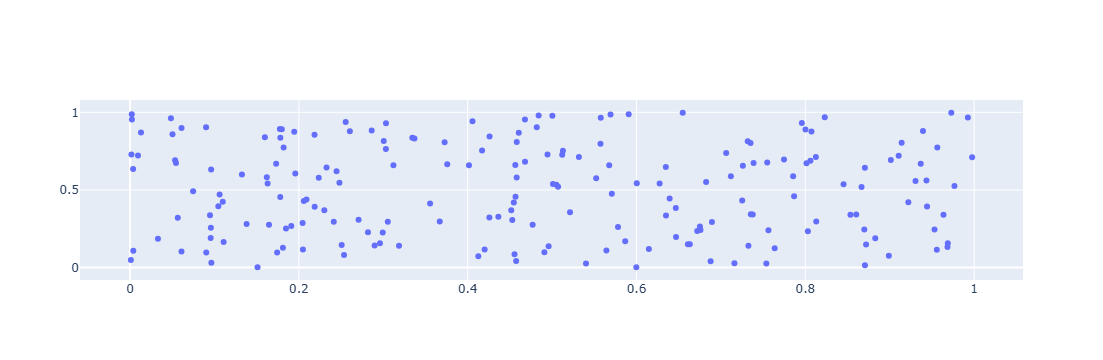

In [54]:
# Dependancies
import plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Jupyter notebook setup
init_notebook_mode(connected=True)

# Test
N = 200
example_x = np.random.rand(N)
example_y = np.random.rand(N)

# Creating the trace
trace = go.Scatter(
    x = example_x,
    y = example_y,
    mode = 'markers')

# Plotting the data
data = [trace]
iplot(data)

### Creating a pie chart

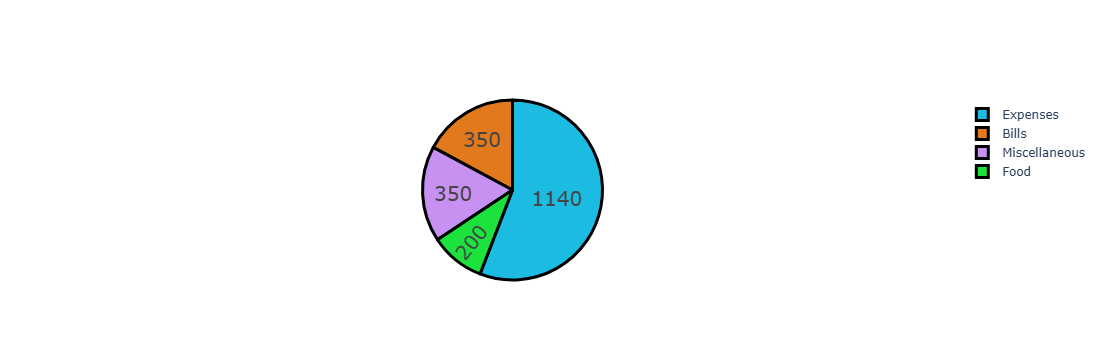

In [56]:
# Expenses 

# Labelling categories
groups = ['Expenses', 'Food', 'Bills', 'Miscellaneous']

# Creating amounts
amount = [1140, 200, 350, 350]

# Style
colours = ['#1cbbe2', '#1ce23d', '#e2791c', '#c791f1']

trace = go.Pie(labels=groups, values=amount, hoverinfo='label+percent', 
               textinfo='value', textfont=dict(size=20),
               marker=dict(colors=colours,
                           line=dict(color='#000000', width=3)))

# Plot
iplot([trace])

### Importing data from a CSV to plot

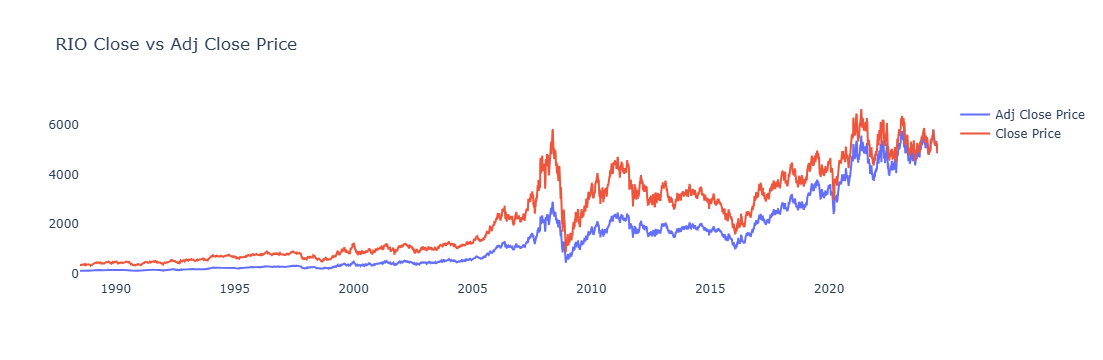

In [170]:
# Getting data
RIO = pd.read_csv('C:/Users/nelli/OneDrive/Documents/Investing/Companies/Rio Tinto/Data/RIO.csv')

# Grabbing Adj Close
Close = RIO['Close']
Adj_Close = RIO['Adj Close']
Date = RIO['Date']

# Plotting data
trace = go.Scatter( x = Date, y = Adj_Close,
                   name = 'Adj Close Price')
trace1 = go.Scatter( x = Date, y = Close,
                   name = 'Close Price')
layout = go.Layout(title='RIO Close vs Adj Close Price', 
                   plot_bgcolor=('#FFFFFF'),
                   showlegend = True) 

fig = go.Figure(data=[trace, trace1], layout=layout)
fig.update_layout(hovermode="x unified")
iplot(fig, filename='RIO')

### Portfolio Diversification 3D Scatter Plot

[*********************100%%**********************]  7 of 7 completed


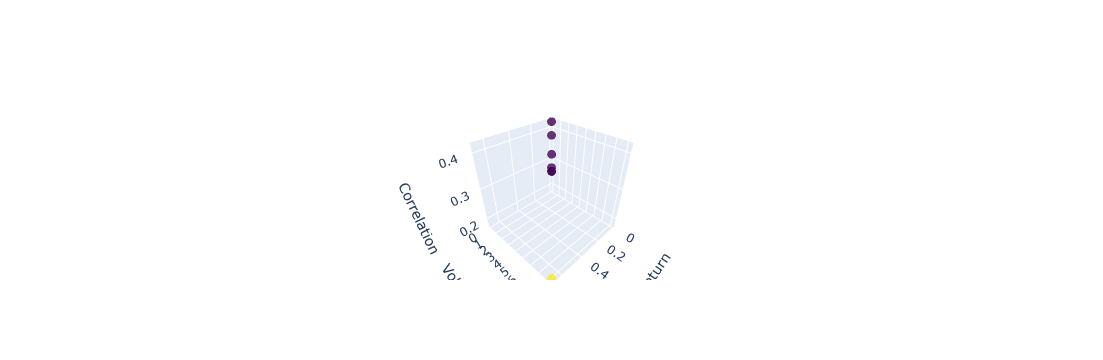

In [230]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# List of tickers
tickers = ['FRCH.L', 'IIND.L', 'BBDS.L', 'BCOG.L', 'VWRL.L', 'IUSA.L', 'GLDW.L']

# Fetch data
data = yf.download(tickers, start="2024-01-01", end="2024-08-01")['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Example variables for axes (e.g., mean return, volatility, and correlation)
mean_returns = returns.mean()
volatility = returns.std()
correlation = returns.corr().mean()

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=mean_returns,
    y=volatility,
    z=correlation,
    mode='markers',
    marker=dict(size=5, color=mean_returns, colorscale='Viridis', opacity=0.8)
)])

fig.update_layout(scene=dict(
    xaxis_title='Mean Return',
    yaxis_title='Volatility',
    zaxis_title='Correlation'
))

fig.show()

### Rolling Returns 3D plot

[*********************100%%**********************]  7 of 7 completed


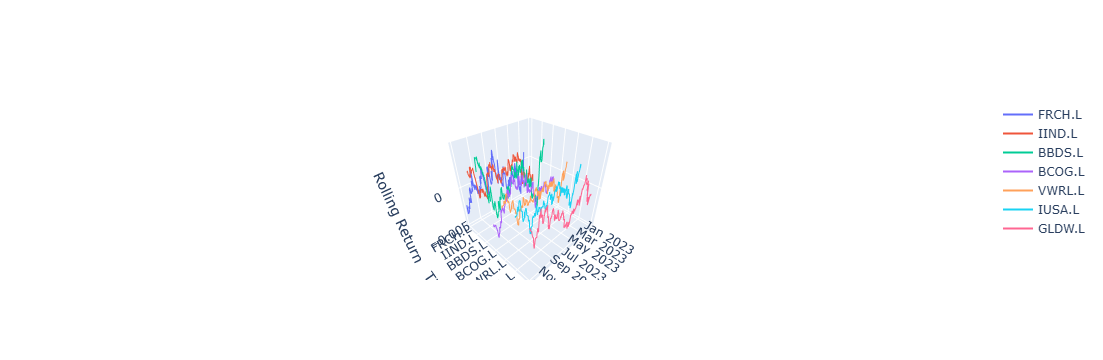

In [204]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# List of tickers
tickers = ['FRCH.L', 'IIND.L', 'BBDS.L', 'BCOG.L', 'VWRL.L', 'IUSA.L', 'GLDW.L']

# Fetch data
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate rolling returns (e.g., 30-day rolling returns)
rolling_returns = returns.rolling(window=30).mean()

# Create 3D line plot
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter3d(
        x=rolling_returns.index,
        y=[ticker] * len(rolling_returns),
        z=rolling_returns[ticker],
        mode='lines',
        name=ticker
    ))

fig.update_layout(scene=dict(
    xaxis_title='Date',
    yaxis_title='Ticker',
    zaxis_title='Rolling Return'
))

fig.show()

In [208]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm

# List of tickers
tickers = ['FRCH.L', 'IIND.L', 'BBDS.L', 'BCOG.L', 'VWRL.L', 'IUSA.L', 'GLDW.L']

# Fetch data
data = yf.download(tickers, start="2013-01-01", end="2024-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Portfolio weights (example: equally weighted)
weights = np.array([1/len(tickers)] * len(tickers))

# Calculate portfolio returns
portfolio_returns = returns.dot(weights)

# Calculate mean and standard deviation of portfolio returns
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate VaR using the parametric method
VaR = norm.ppf(alpha, mean_return, std_return)

# Calculate CVaR (also known as Expected Shortfall)
CVaR = alpha**-1 * norm.pdf(norm.ppf(alpha)) * std_return - mean_return

print(f"Parametric VaR at {confidence_level*100}% confidence level: {VaR:.2%}")
print(f"Conditional VaR (CVaR) at {confidence_level*100}% confidence level: {CVaR:.2%}")

[*********************100%%**********************]  7 of 7 completed

Parametric VaR at 95.0% confidence level: -1.11%
Conditional VaR (CVaR) at 95.0% confidence level: 1.39%


[*********************100%%**********************]  7 of 7 completed


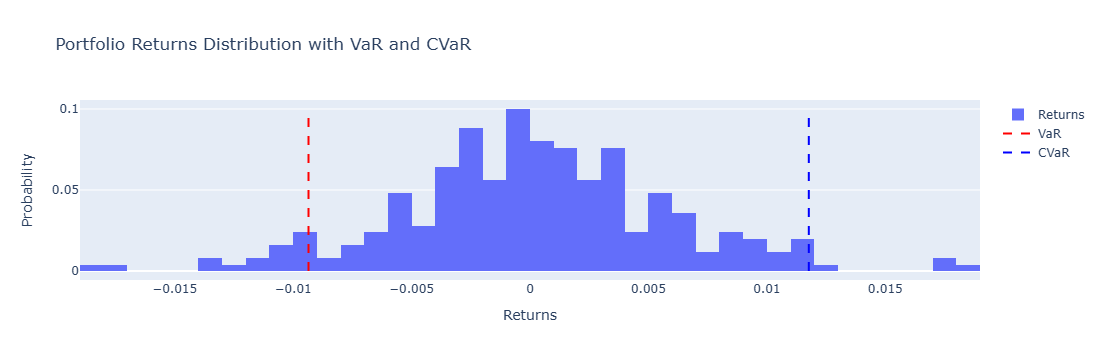

In [210]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# List of tickers
tickers = ['FRCH.L', 'IIND.L', 'BBDS.L', 'BCOG.L', 'VWRL.L', 'IUSA.L', 'GLDW.L']

# Fetch data
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Portfolio weights (example: equally weighted)
weights = np.array([1/len(tickers)] * len(tickers))

# Calculate portfolio returns
portfolio_returns = returns.dot(weights)

# Calculate mean and standard deviation of portfolio returns
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate VaR using the parametric method
VaR = norm.ppf(alpha, mean_return, std_return)

# Calculate CVaR (also known as Expected Shortfall)
CVaR = alpha**-1 * norm.pdf(norm.ppf(alpha)) * std_return - mean_return

# Plotting the distribution of returns
fig = go.Figure()

# Histogram of returns
fig.add_trace(go.Histogram(x=portfolio_returns, nbinsx=50, name='Returns', histnorm='probability'))

# VaR line
fig.add_trace(go.Scatter(x=[VaR, VaR], y=[0, 0.1], mode='lines', name='VaR', line=dict(color='red', dash='dash')))

# CVaR line
fig.add_trace(go.Scatter(x=[CVaR, CVaR], y=[0, 0.1], mode='lines', name='CVaR', line=dict(color='blue', dash='dash')))

fig.update_layout(title='Portfolio Returns Distribution with VaR and CVaR',
                  xaxis_title='Returns',
                  yaxis_title='Probability')

fig.show()